In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data.csv')

In [30]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

## Data Cleaning and Preprocessing

In [31]:
df.drop('Unnamed: 32',axis = 1, inplace = True)

In [14]:
df['target']=df.diagnosis.apply(lambda x: 1 if x=='M' else 0)

In [20]:
df.iloc[:,2:].corr()['target'].sort_values(ascending=False)

target                     1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [32]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [33]:
df = df.loc[:,['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
df['diagnosis']=df.diagnosis.apply(lambda x: "Malignant" if x=='M' else "Benign")
df.columns = ['id', 'diagnosis', 'radius', 'texture', 'perimeter',
       'area', 'smoothness', 'compactness', 'concavity',
       'concavepoints', 'symmetry', 'fractaldimension']
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [78]:
df.iloc[:,2:].describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [34]:
df.to_csv('data_cleaned.csv', index = False)

## PCA

In [64]:
df_num = df.iloc[:,2:]
scale = StandardScaler()
dat = scale.fit_transform(df_num)
n_comp = len(df_num.columns)
pca = PCA(n_components = n_comp)
comps = pca.fit_transform(dat)

In [65]:
pca = PCA(n_components = n_comp)

comps = pca.fit_transform(dat)

In [43]:
type(comps)

numpy.ndarray

In [70]:
df_tmp = df.iloc[:,:2]
df_tmp['pca1'] = comps[:,0]
df_tmp['pca2'] = comps[:,1]

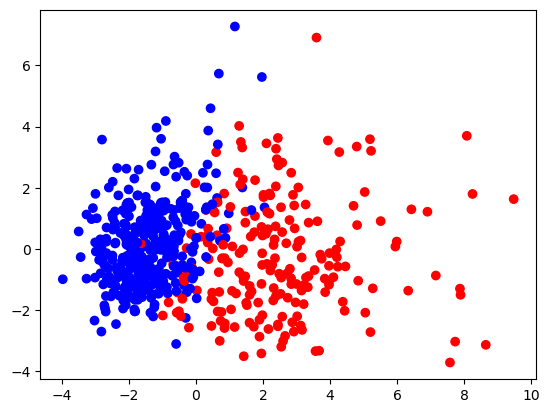

In [66]:
plt.scatter(comps[:,0],comps[:,1], c=df.diagnosis.apply(lambda x: 'red' if x=='Malignant' else 'blue'))

## Deploy to Tabpy Server

In [51]:
from tabpy.tabpy_tools.client import Client
connection = Client('http://localhost:9004/')

In [52]:
def pca1(_arg1, _arg2, _arg3, _arg4, _arg5, _arg6, _arg7, _arg8, _arg9, _arg10):
    df = pd.DataFrame({'var1':_arg1, 'var2':_arg2, 'var3':_arg3, 'var4':_arg4, 'var5':_arg5, 'var6':_arg6,
    'var7':_arg7, 'var8':_arg8, 'var9':_arg9, 'var10':_arg10})

    scale = StandardScaler()
    dat = scale.fit_transform(df)
    n_comp = len(df.columns)
    pca = PCA(n_components = n_comp)

    comps = pca.fit_transform(dat)
    return comps[:,0].tolist()

In [53]:
connection.deploy('PCA1',
                  pca1,
                  'Returns the first principal component using Breast Cancer dataset', override = True)